In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('cars.csv')

In [4]:
len(df.loc[df['Тип кузова'] == 'Гран туризмо (GT)'])

83

In [5]:
df['Грузоподъемность на площадь, кг\м'] = df['Максимальная грузоподъемность, кг'] / (df['Длина, мм'] * df['Ширина, мм']) * 1000000 #kg/m

In [132]:

df_sample = df.loc[df['Грузоподъемность на площадь, кг\м'].notnull()]
df_sample = df_sample.loc[df_sample['Максимальная скорость, км/ч'].notnull()]
df_car1 = df_sample.loc[df_sample['Тип кузова'] == 'Кабриолет'].sample(80)
df_car2 = df_sample.loc[df_sample['Тип кузова'] == 'Пикап'].sample(80)
df_car3 = df_sample.loc[df_sample['Тип кузова'] == 'Хэтчбек'].sample(80)
df_sample = pd.concat([df_car1, df_car2, df_car3])
print(len(df_sample))
print(df_sample['Максимальная скорость, км/ч'].max())

for i in range(2):
    df_car1.drop(index=df_car1['Грузоподъемность на площадь, кг\м'].idxmax(), inplace=True)
    df_car1.drop(index=df_car1['Грузоподъемность на площадь, кг\м'].idxmin(), inplace=True)

    df_car2.drop(index=df_car2['Грузоподъемность на площадь, кг\м'].idxmax(), inplace=True)
    df_car2.drop(index=df_car2['Грузоподъемность на площадь, кг\м'].idxmin(), inplace=True)

    df_car3.drop(index=df_car3['Грузоподъемность на площадь, кг\м'].idxmax(), inplace=True)
    df_car3.drop(index=df_car3['Грузоподъемность на площадь, кг\м'].idxmin(), inplace=True)


    df_car1.drop(index=df_car1['Максимальная скорость, км/ч'].idxmax(), inplace=True)
    df_car1.drop(index=df_car1['Максимальная скорость, км/ч'].idxmin(), inplace=True)

    df_car2.drop(index=df_car2['Максимальная скорость, км/ч'].idxmax(), inplace=True)
    df_car2.drop(index=df_car2['Максимальная скорость, км/ч'].idxmin(), inplace=True)

    df_car3.drop(index=df_car3['Максимальная скорость, км/ч'].idxmax(), inplace=True)
    df_car3.drop(index=df_car3['Максимальная скорость, км/ч'].idxmin(), inplace=True)

df_sample = pd.concat([df_car1, df_car2, df_car3])
print(df_sample['Максимальная скорость, км/ч'].max())
print(len(df_sample))
df_sample.to_csv('output.csv')
X_cars = np.array([df_sample['Максимальная скорость, км/ч'], 
                   df_sample['Грузоподъемность на площадь, кг\м']
                   ]).transpose()
y_cars = df_sample['Тип кузова']
X_train, X_test, y_train, y_test = train_test_split(X_cars, y_cars, test_size=0.3, random_state=0)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

240
328.0
301.0
216


In [133]:
def type_to_num(str):
    if str == 'Кабриолет':
        return 0
    if str == 'Пикап':
        return 1
    return 2

def type_list_to_num(type_list):
    return list(map(type_to_num, type_list))

def plot_decision_boundary(clf, X, y):
    y = list(map(type_to_num, y))
    clf.fit(X, y)
    disp = DecisionBoundaryDisplay.from_estimator(clf, X, response_method="predict", alpha=0.5)
    disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
    plt.show()

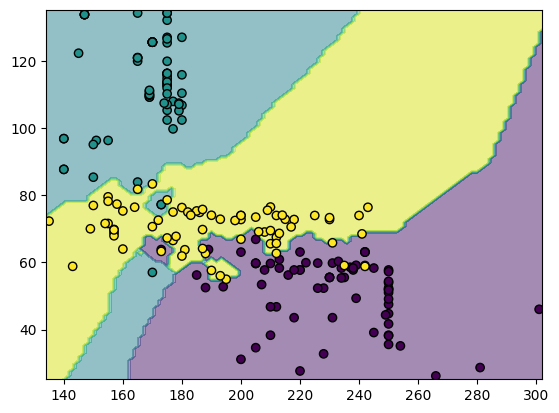

In [135]:
plot_decision_boundary(KNeighborsClassifier(n_neighbors=2, algorithm='brute'), X_cars, y_cars)

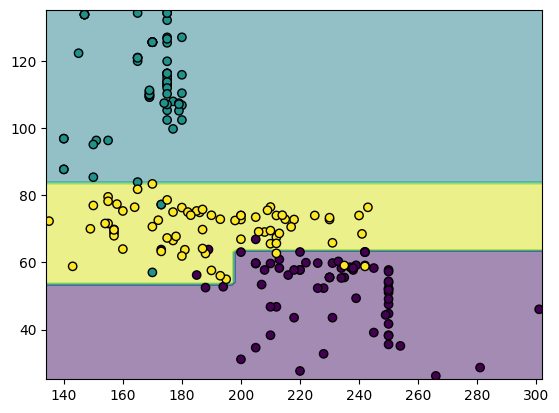

In [136]:
plot_decision_boundary(DecisionTreeClassifier(max_depth=4), X_cars, y_cars)

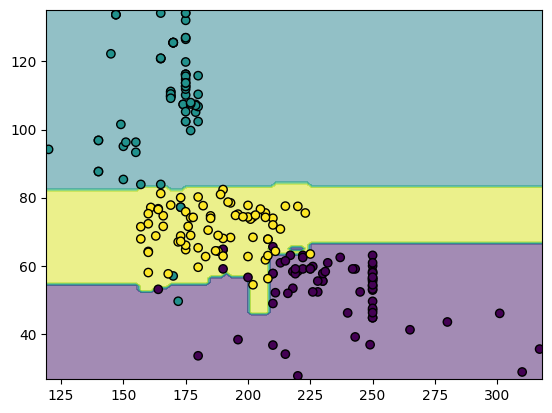

In [10]:
plot_decision_boundary(RandomForestClassifier(max_depth=4), X_cars, y_cars)

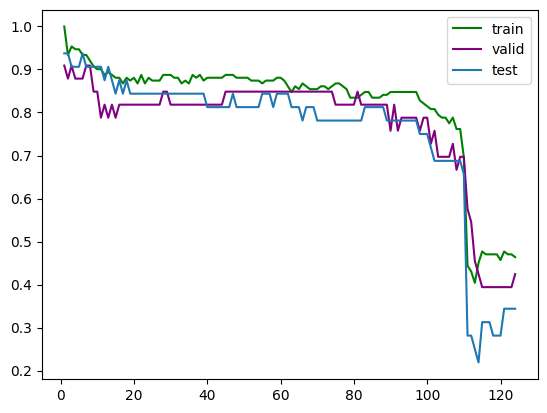

In [137]:
def plot_qualities(x_range, qua1, qua2, qua3):
    plt.plot(x_range, qua1, color='green', label='train')
    plt.plot(x_range, qua2, color='purple', label='valid')
    plt.plot(x_range, qua3, label='test')
    plt.legend()
    plt.show()

from sklearn.metrics import accuracy_score
quality_train = []
quality_valid = []
quality_test = []
hyp_range = range(1,125)

for i in hyp_range:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)

    predicted = clf.predict(X_train)
    quality_train.append(accuracy_score(y_train, predicted))

    predicted = clf.predict(X_valid)
    quality_valid.append(accuracy_score(y_valid, predicted))

    predicted = clf.predict(X_test)
    quality_test.append(accuracy_score(y_test, predicted))
plot_qualities(hyp_range, quality_train, quality_valid, quality_test)

29
29
29


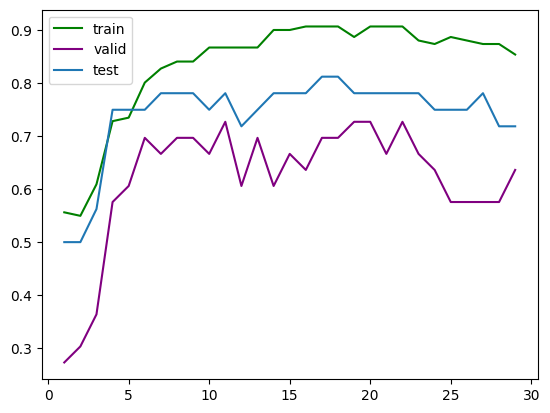

In [138]:
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

def round_pred(pred):
    return list(map(round, pred))

quality_train = []
quality_valid = []
quality_test = []

cipher_y_train = list(map(type_to_num, y_train))
cipher_y_valid = list(map(type_to_num, y_valid))
cipher_y_test = list(map(type_to_num, y_test))

hyp_range = range(1, 30)

for i in hyp_range:
    pr = PolynomialFeatures(degree = i)
    X_poly = pr.fit_transform(X_train)
    lr_2 = LinearRegression()
    lr_2.fit(X_poly, cipher_y_train)
    
    predicted = round_pred(lr_2.predict(pr.fit_transform(X_train)))
    quality_train.append(accuracy_score(cipher_y_train, predicted))

    predicted = round_pred(lr_2.predict(pr.fit_transform(X_valid)))
    quality_valid.append(accuracy_score(cipher_y_valid, predicted))

    predicted = round_pred(lr_2.predict(pr.fit_transform(X_test)))
    quality_test.append(accuracy_score(cipher_y_test, predicted))

print(len(quality_train))
print(len(quality_valid))
print(len(quality_test))
plot_qualities(hyp_range, quality_train, quality_valid, quality_test)


29
29
29


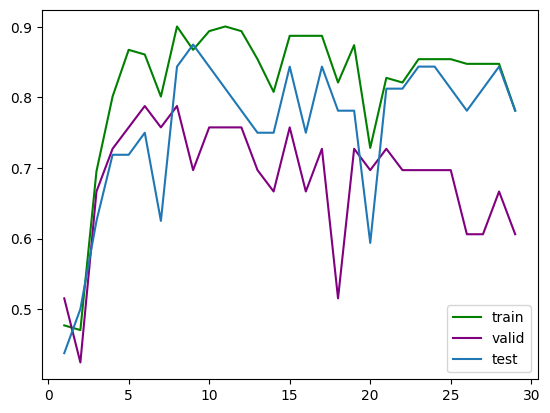

In [13]:
err_train = []
err_valid = []
err_test = []

cipher_y_train = list(map(type_to_num, y_train))
cipher_y_valid = list(map(type_to_num, y_valid))
cipher_y_test = list(map(type_to_num, y_test))

hyp_range = range(1, 30)

for i in hyp_range:
    pr = PolynomialFeatures(degree = i)
    X_poly = pr.fit_transform(X_train)
    lr_2 = LinearRegression()
    lr_2.fit(X_poly, cipher_y_train)
    
    predicted = round_pred(lr_2.predict(pr.fit_transform(X_train)))
    err_train.append(accuracy_score(cipher_y_train, predicted))

    predicted = round_pred(lr_2.predict(pr.fit_transform(X_valid)))
    err_valid.append(accuracy_score(cipher_y_valid, predicted))

    predicted = round_pred(lr_2.predict(pr.fit_transform(X_test)))
    err_test.append(accuracy_score(cipher_y_test, predicted))

print(len(err_train))
print(len(err_valid))
print(len(err_test))
plot_errors(hyp_range, err_train, err_valid, err_test)

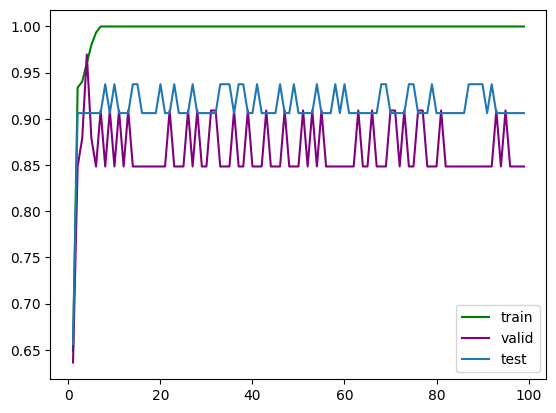

In [14]:
err_train = []
err_valid = []
err_test = []

hyp_range = range(1, 100)

for i in hyp_range:
    clf = DecisionTreeClassifier(max_depth=i)
    clf.fit(X_train, y_train)

    predicted = clf.predict(X_train)
    err_train.append(accuracy_score(y_train, predicted))

    predicted = clf.predict(X_valid)
    err_valid.append(accuracy_score(y_valid, predicted))

    predicted = clf.predict(X_test)
    err_test.append(accuracy_score(y_test, predicted))
    
plot_errors(hyp_range, err_train, err_valid, err_test)
    

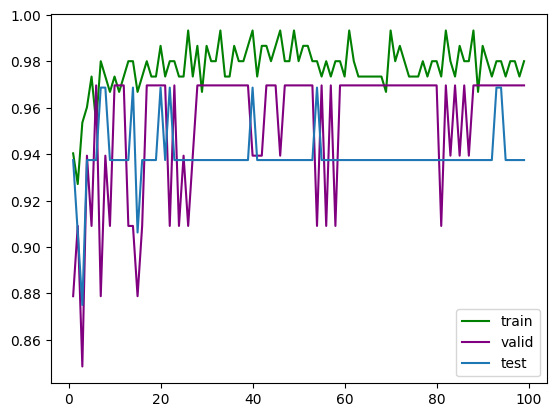

In [15]:
err_train = []
err_valid = []
err_test = []

hyp_range = range(1, 100)

for i in hyp_range:
    clf = RandomForestClassifier(n_estimators=i, max_depth=5)
    clf.fit(X_train, y_train)

    predicted = clf.predict(X_train)
    err_train.append(accuracy_score(y_train, predicted))

    predicted = clf.predict(X_valid)
    err_valid.append(accuracy_score(y_valid, predicted))

    predicted = clf.predict(X_test)
    err_test.append(accuracy_score(y_test, predicted))

plot_errors(hyp_range, err_train, err_valid, err_test)

In [536]:
arr = np.array([1, 2, 3, 4])
print(arr[2])

3


In [111]:
class MyKNeighborsClassifier:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def dist(self, x1, x2):
        sm = 0
        for i in range(len(x1)):
            sm += (x1[i] - x2[i]) ** 2
        return sm ** (0.5)

    def fit(self, X, y):
        self._X = X
        if not isinstance(y, list):
            self._y = y.to_list()
        else:
            self._y = y
    
    def predict(self, X_from):
        res = []
        for x in X_from:
            neighbours = []
            for i in range(len(self._X)):
                neighbours.append((self.dist(x, self._X[i]), i))
            neighbours.sort(key=lambda tup: float(tup[0]))
            votes = dict()
            # print()
            for neighbour in neighbours[:self.n_neighbors]:
                decision = self._y[neighbour[1]]
                if decision not in votes.keys():
                    votes[decision] = 0
                votes[decision] += 1
            # print(votes)
            decision = ''
            mx = -1
            for u in votes.keys():
                if (votes[u] > mx):
                    mx = votes[u]
                    decision = u
            res.append(decision)
        return res

In [126]:
# my_clf = MyKNeighborsClassifier(n_neighbors=1)
# my_clf.fit(X_train, y_train)
# quality = accuracy_score(my_clf.predict(X_valid), y_valid)
hyp_range = range(1, 100)
best_hyp = 0
max_quality = -1
quality_arr = []
for i in hyp_range:
    my_clf = MyKNeighborsClassifier(n_neighbors=i)
    my_clf.fit(X_train, y_train)
    quality = accuracy_score(my_clf.predict(X_valid), y_valid)
    quality_arr.append(quality)
    if quality > max_quality:
        max_quality = quality
        best_hyp = i

print(max_quality, best_hyp)

my_clf = MyKNeighborsClassifier(n_neighbors=best_hyp)
my_clf.fit(X_train, y_train)
my_predicted = my_clf.predict(X_test)
my_quality = accuracy_score(y_test, my_predicted)

print("My quality:", my_quality)

clf = KNeighborsClassifier(n_neighbors=best_hyp, algorithm='brute')
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
quality = accuracy_score(y_test, predicted)

print("Library quality:", quality)

print("Error of qualities:", mean_absolute_percentage_error([quality], [my_quality]))

0.9696969696969697 4
My quality: 0.90625
Library quality: 0.90625
Error of qualities: 0.0
